In [1]:
import sys
sys.path.insert(0, '../')

# Masks

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from yuntu import Audio
from yuntu.core.geometry import base as geom

In [3]:
SAMPLE_AUDIO = '/Users/erobredo/Downloads/11k16bitpcm.wav'
audio = Audio(path=SAMPLE_AUDIO)

In [4]:
spec = audio.features.db_spectrogram()
linestring = geom.LineString(vertices=[(0, 0), (1, 1000), (4,1000), (5, 0)])

In [5]:
mask = spec.to_mask(linestring.buffer([0.1, 200]))

In [6]:
audio_cut = audio.cut(start_time=4, end_time=8)

In [7]:
audio_mask = audio_cut.to_mask(linestring.buffer([0.1, 200]), lazy=True)

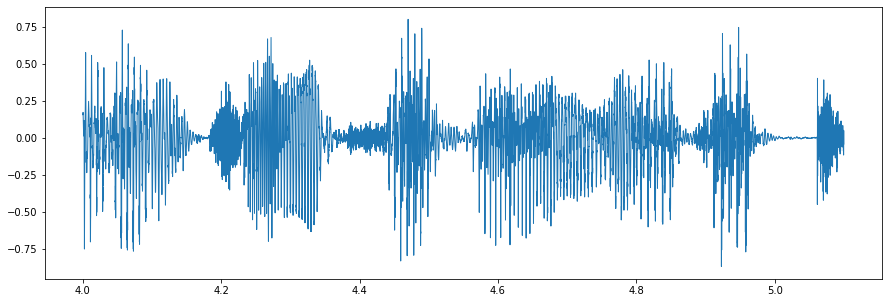

In [8]:
audio_mask.plot(figsize=(15, 5), media=True, mask=False, color='red')

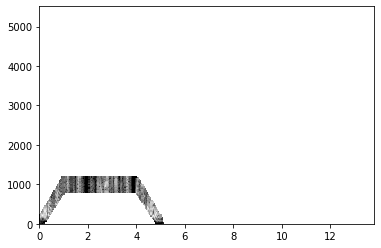

In [9]:
mask.plot(media=True, mask=False)

In [10]:
a = linestring.buffer([0.1, 200])

In [12]:
mask.to_dict()

ValueError: Window data does not have a type.

In [ ]:
roi = linestring.buffer([0.1, 200])
mask = spec.to_mask(roi)
values = spec[mask]
print(np.mean(values))

In [ ]:
shell = [(2, 1000), (3, 1500), (4, 4500), (0, 3300)]
holes = [
    [(1, 3000), (2, 1500), (2.5, 2500)],
    [(2.5, 3500), (3, 4000), (3.5, 3400)]
]

polygon = geom.Polygon(shell=shell, holes=holes)

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(spec.to_mask(polygon), origin='bottom', aspect='auto')

In [ ]:
from yuntu.core.geometry.utils import geometry_neighbourhood
from yuntu.core.geometry.utils import geometry_to_mask

In [ ]:
mask = geometry_to_mask(
    linestring.geometry,
    shape=spec.shape,
    transformX=spec.get_index_from_time,
    transformY=spec.get_index_from_frequency)

In [ ]:
spec.shape

In [ ]:
_, ax = plt.subplots(figsize=(15, 5))
plt.pcolormesh(spec.times, spec.frequencies, spec.to_mask(linestring.buffer([0.1, 200])))
linestring.plot(ax=ax, linewidth=3)

In [ ]:
_, ax = plt.subplots(figsize=(15, 5))
ax.pcolormesh(spec.times, spec.frequencies, mask)
linestring.plot(ax=ax, linewidth=3)

In [ ]:
ax = linestring.buffer([0.1, 200]).plot()
linestring.plot(ax=ax, color='blue')

In [ ]:
from yuntu.core.geometry.utils import point_buffer

In [ ]:
X, Y = zip(*linestring)

p_buffer = point_buffer(X[1], Y[1], [0.1, 100])

_, ax = plt.subplots(figsize=(15, 5))
plt.pcolormesh(spec.times, spec.frequencies, spec.to_mask(p_buffer))
linestring.plot(ax=ax, linewidth=3)

In [ ]:
spec.get_aggr_value(time=1, freq=1000, buffer=[0.05, 50], aggr_func=lambda x: np.percentile(x, 90))

In [ ]:
from yuntu.core.windows import TimeFrequencyWindow

In [ ]:
ftwindow = TimeFrequencyWindow(start=2, end=6, min=1000, max=3000)

In [ ]:
window = ftwindow.to_time()

In [ ]:
spec.get_aggr_value(window=ftwindow)

In [ ]:
spec.get_aggr_value(window=ftwindow, buffer=[0.1, 50])

In [ ]:
spec.get_aggr_value(geometry=linestring.buffer(time=0.1, freq=200))

In [ ]:
spec.get_aggr_value(geometry=linestring.buffer([0.1, 200]), bins=5)

In [ ]:
_, ax = plt.subplots(figsize=(15, 5))
spec.plot(ax=ax)
linestring.plot(ax=ax, linewidth=2)
window.plot(ax=ax, linewidth=2)
ftwindow.plot(ax=ax, color='green', linewidth=2)

In [ ]:
ftwindow.to_dict()